### aim: 

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## u and v components at closest-to 70s, 50s 30s, and wspd, for years 1983 and 2017

In [9]:
y = 1983
doe = xr.open_dataset('/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/data_vwnd.nc')
# w = xr.open_dataset(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NASA-MERRA2/raw/MERRA2_400.tavg1_2d_flx_Nx.{y}1229.nc4.nc4?SPEED,ULML,VLML,time,lat,lon')
ncar = xr.open_dataset(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/windV/vwnd.10m.gauss.{y}.nc')
era =  xr.open_dataset('/gpfs/data/greenocean2/software/products/windsFromComponents/ERA5_v2024/scripts/10m_v_component_of_wind_ERA5_1983.nc')

In [17]:
era

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 8760)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1983-01-01 ... 1983-12-31T23:00:00
Data variables:
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-21 09:40:17 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

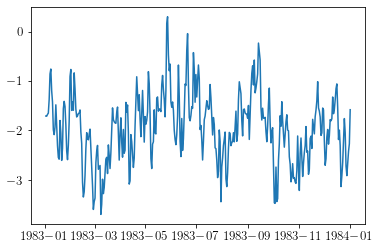

In [25]:
y = 1983
doe = xr.open_dataset('/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/data_vwnd.nc')
# w = xr.open_dataset(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NASA-MERRA2/raw/MERRA2_400.tavg1_2d_flx_Nx.{y}1229.nc4.nc4?SPEED,ULML,VLML,time,lat,lon')
ncar = xr.open_dataset(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/windV/vwnd.10m.gauss.{y}.nc')
era =  xr.open_dataset('/gpfs/data/greenocean2/software/products/windsFromComponents/ERA5_v2024/scripts/10m_v_component_of_wind_ERA5_1983.nc')

tlat = -50 

does = doe.sel(time = slice(f'{y}-01-01',f'{1+y}-01-01')).sel(lat=tlat, method='nearest').mean(dim = 'lon')
ncars = ncar.sel(time = slice(f'{y}-01-01',f'{1+y}-01-01')).sel(lat=tlat, method='nearest').mean(dim = 'lon')
eras = era.sel(time = slice(f'{y}-01-01',f'{1+y}-01-01')).sel(latitude=tlat, method='nearest').mean(dim = 'longitude')


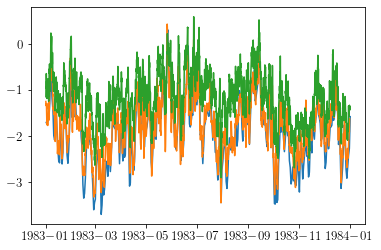

In [34]:
plt.plot(does.time,does.vwnd[:,0])
plt.plot(ncars.time,ncars.vwnd[:])
plt.plot(eras.time,eras.v10[:])

In [36]:
y = 1983
doe = xr.open_dataset('/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-DOE/data_uwnd.nc')
# w = xr.open_dataset(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NASA-MERRA2/raw/MERRA2_400.tavg1_2d_flx_Nx.{y}1229.nc4.nc4?SPEED,ULML,VLML,time,lat,lon')
ncar = xr.open_dataset(f'/gpfs/data/greenocean2/software/products/windsFromComponents/NCEP-NCAR/windU/uwnd.10m.gauss.{y}.nc')
era =  xr.open_dataset('/gpfs/data/greenocean2/software/products/windsFromComponents/ERA5_v2024/scripts/10m_u_component_of_wind_ERA5_1983.nc')

tlat = -50 

does = doe.sel(time = slice(f'{y}-01-01',f'{1+y}-01-01')).sel(lat=tlat, method='nearest').mean(dim = 'lon')
ncars = ncar.sel(time = slice(f'{y}-01-01',f'{1+y}-01-01')).sel(lat=tlat, method='nearest').mean(dim = 'lon')
eras = era.sel(time = slice(f'{y}-01-01',f'{1+y}-01-01')).sel(latitude=tlat, method='nearest').mean(dim = 'longitude')


7.6184735
6.7801557
6.770192


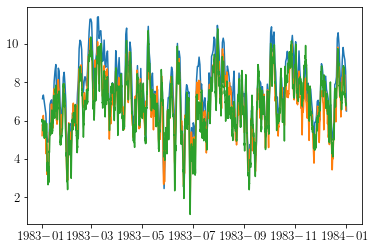

In [38]:
plt.plot(does.time,does.uwnd[:,0])
plt.plot(ncars.time,ncars.uwnd[:])
plt.plot(eras.time,eras.u10[:])
print(np.nanmean(does.uwnd[:,0]))
print(np.nanmean(ncars.uwnd[:]))
print(np.nanmean(eras.u10[:]))

In [12]:
yr = 1980
era_u = xr.open_dataset(f'/gpfs/data/greenocean2/software/products/windsFromComponents/ERA5_v2024/scripts/10m_u_component_of_wind_ERA5_{yr}.nc')
era_v = xr.open_dataset(f'/gpfs/data/greenocean2/software/products/windsFromComponents/ERA5_v2024/scripts/10m_v_component_of_wind_ERA5_{yr}.nc')
era_w = xr.open_dataset(f'/gpfs/data/greenocean2/software/products/windsFromComponents/ERA5_v2024/scripts/10m_windspeed_ERA5_{yr}.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/gpfs/data/greenocean2/software/products/windsFromComponents/ERA5_v2024/scripts/10m_windspeed_ERA5_1983.nc'

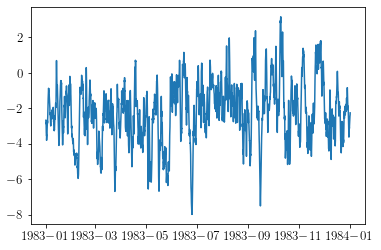

In [11]:
era_us = era_u.u10.sel(latitude=-70, method='nearest').mean(dim = 'longitude')
era_vs = era_v.u10.sel(latitude=-70, method='nearest').mean(dim = 'longitude')
era_vs = era_v.u10.sel(latitude=-70, method='nearest').mean(dim = 'longitude')

plt.plot(era_us.time, era_us)

fact = 1.1
fig, axs = plt.subplots(3,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(